## Objective :-
To Perform text classification of News Headlines and classify news into different topics for a news website using Naive Bayes Classifier.

In [1]:
# Loading the required Packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
# Defining all the Categories
categories = ['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
              'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
              'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 
              'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast',
              'talk.politics.misc', 'talk.religion.misc']

# Training the data on these categories
train = fetch_20newsgroups(subset = 'train', categories = categories)

#Testing the data for these categories
test = fetch_20newsgroups(subset = 'test', categories = categories)

In [6]:
# Printing training data
print(train.data[5])

From: dfo@vttoulu.tko.vtt.fi (Foxvog Douglas)
Subject: Re: Rewording the Second Amendment (ideas)
Organization: VTT
Lines: 58

In article <1r1eu1$4t@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>In article <1993Apr20.083057.16899@ousrvr.oulu.fi>, dfo@vttoulu.tko.vtt.fi (Foxvog Douglas) writes:
>> In article <1qv87v$4j3@transfer.stratus.com> cdt@sw.stratus.com (C. D. Tavares) writes:
>> >In article <C5n3GI.F8F@ulowell.ulowell.edu>, jrutledg@cs.ulowell.edu (John Lawrence Rutledge) writes:
>
>> >> The massive destructive power of many modern weapons, makes the
>> >> cost of an accidental or crimial usage of these weapons to great.
>> >> The weapons of mass destruction need to be in the control of
>> >> the government only.  Individual access would result in the
>> >> needless deaths of millions.  This makes the right of the people
>> >> to keep and bear many modern weapons non-existant.

>> >Thanks for stating where you're coming from.  Needless to say, I
>> >disagree 

In [12]:
#Printing length of training and testing data :-
print(len(train.data))

print(len(test.data))

11314
7532


## Actual Naive Bayes for Actual Predictions

In [17]:
## Importing necessary packages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [19]:
#Creating a model based on Multinomial naive Bayes :-
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

Lets train our model for word vectorizion

In [20]:
#Training our model with train data
model.fit(train.data, train.target)

Pipeline(memory=None,
         steps=[('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

Great our model is ready trained, Let's create Lebels for test data :-

In [21]:
#Creating labels 
labels = model.predict(test.data)

Now though we have created labels for our models it's time to create Confusion matrix and Heat Map for our model.

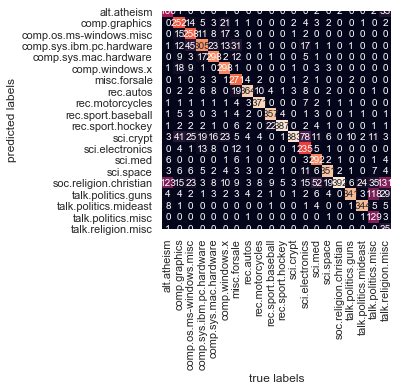

In [27]:
#creating confusion matrix and heat map
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)

sns.heatmap(mat.T, square = True, annot = True, fmt = 'd' , cbar = False
            , xticklabels = train.target_names
            , yticklabels = train.target_names)

# PLoting Heatmap of confusion Matrix :-
plt.xlabel('true labels')
plt.ylabel('predicted labels');

In [30]:
#Predicting category on new data based on trained model :-
def predict_category(s, train = train, model = model) :
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [31]:
#Let's predict category for a random word.
predict_category('Jesus Christ')

'soc.religion.christian'

In [32]:
predict_category('Sending load to International Space Station')

'sci.space'

In [33]:
predict_category('BMW is better than Audi')

'rec.autos'

In [34]:
predict_category('President of India')

'talk.politics.misc'

## Great !!
we were able to correctly classify text into different groups based on which category they belongs to using Naive Bayes Classifier.